In [1]:
import pandas as pd

In [6]:
text_ana= pd.read_excel('text_analysis_weibo_sample.xlsx')

In [8]:
text_ana

,Unnamed: 0,index,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,0,34121,国债：地产行业重磅利好提振风险偏好，期债低开低走 国债期货全线收跌，10年期主力...,0,0,0,e5df796860e68f403bcf9651bab4d42e,0,0,其他
1,1,40230,#喜迎二十大 忠诚保平安#,0,0,0,6e35cb69ad52f20de5e28197b2e85306,405444,252,广西
2,2,7714,注意！事关明日教资考试！福建省教育考试院发布补充公告 福建省2022年下半年全国中小学教师...,0,0,0,e6953217442e6c06a7af23eee5e185f2,53264,2177,福建
3,3,27378,近日，“千年大计”雄安新区迎来五周岁生日。从“一张白纸...,0,0,0,NaN,0,0,北京
4,4,15435,樊振东牛逼！,0,0,0,344af41eac516375c04dee6325e763cc,8,51,山东
...,...,...,...,...,...,...,...,...,...,...
95,95,14034,老公好漂亮[舔屏],0,0,0,aa7af97ae98cbe8983e559b948ecfabf,825,191,北京
96,96,35249,恭喜@张小娜呀娜 1名用户获得【小飞T】。C官方唯一抽奖工具@C抽奖平台 对本次抽奖进行监督...,0,0,2,f538513e5801c275cbcf285517a8ee62,51709,20,北京
97,97,39598,接不动了，居民部门负债率提升空间太有限了。现在动辄几万一平米，总价高，月供高，预期转差，还怎...,0,0,0,2e76c39b6665a0b6f5bdc4c35f36f573,0,59,四川
98,98,48977,目前电子烟政策已从制定阶段逐渐走向实施阶段，而主要的电子烟公司股价下跌幅度高达70%-...,0,0,0,NaN,0,0,北京


In [ ]:
# pip install jieba

In [10]:
import jieba

In [12]:
def word_segmentation(text):
    words = jieba.lcut(text)
    return ' '.join(words)

In [14]:
text_ana['标题/微博内容']= text_ana['标题/微博内容'].apply(word_segmentation)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/x_/thdhfcgj1bngvjk8cg7mr0k80000gn/T/jieba.cache
Loading model cost 1.313 seconds.
Prefix dict has been built successfully.


In [20]:
text_ana['标题/微博内容'].head()

0        国债 ： 地产 行业 重磅 利好 提振 风险 偏好 ， 期债 低开 低 走     ...
1                                  # 喜迎 二十大   忠诚 保平安 #
2    注意 ！ 事关 明日 教资 考试 ！ 福建省 教育 考试院 发布 补充 公告     福建省...
3                                          近日 ， “ 千...
4                                            樊振东 牛 逼 ！
Name: 标题/微博内容, dtype: object

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vectorizer = CountVectorizer()

In [24]:
X=vectorizer.fit_transform(text_ana['标题/微博内容'].dropna())

In [26]:
print('词袋特征矩阵的形状：', X.shape)

词袋特征矩阵的形状： (100, 5815)


In [28]:
print('特征词列表：',vectorizer.get_feature_names_out())

特征词列表： ['00' '000713' '000998' ... '龙头' '龙头企业' '龙湖']


In [32]:
len(vectorizer.get_feature_names_out())

5815

In [34]:
X

<100x5815 sparse matrix of type '<class 'numpy.int64'>'
	with 9688 stored elements in Compressed Sparse Row format>

In [36]:
feature_words = vectorizer.get_feature_names_out()

In [38]:
feature_words.shape

(5815,)

In [40]:
X.sum(axis=0).shape

(1, 5815)

In [42]:
X.sum(axis=0)[0]

matrix([[6, 1, 1, ..., 2, 1, 2]])

In [44]:
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [46]:
word_freq

{'00': 6,
 '000713': 1,
 '000998': 1,
 '002041': 1,
 '002385': 1,
 '01': 10,
 '02': 4,
 '03': 4,
 '04': 3,
 '05': 4,
 '06': 3,
 '061': 1,
 '07': 6,
 '08': 4,
 '081': 1,
 '0824': 1,
 '09': 16,
 '10': 57,
 '100': 19,
 '1000': 5,
 '10080': 1,
 '101': 1,
 '10180': 1,
 '102': 3,
 '1025': 1,
 '10274': 1,
 '10355': 1,
 '104': 3,
 '10410': 1,
 '10455': 1,
 '105': 1,
 '10510': 1,
 '10685': 1,
 '107': 2,
 '108': 1,
 '1080': 1,
 '10cm': 2,
 '10g': 1,
 '11': 49,
 '110': 3,
 '1100': 1,
 '11089': 1,
 '112': 2,
 '115': 1,
 '116': 1,
 '11724': 1,
 '1189': 1,
 '119': 1,
 '11998': 1,
 '12': 37,
 '120': 4,
 '1200': 2,
 '12000': 2,
 '12010': 1,
 '1210': 1,
 '122': 1,
 '12245': 1,
 '12750': 1,
 '1280': 1,
 '13': 14,
 '130': 1,
 '13050': 1,
 '130eflops': 1,
 '1310': 1,
 '131700': 1,
 '133': 1,
 '13300': 1,
 '13500': 1,
 '136': 2,
 '1360': 1,
 '13686': 1,
 '13817426131': 1,
 '1383': 3,
 '1399': 1,
 '14': 17,
 '1400': 3,
 '1420': 1,
 '145': 1,
 '1477': 1,
 '14815': 1,
 '15': 17,
 '150': 3,
 '1500': 6,
 '15050

In [48]:
word_freq.items()

dict_items([('00', 6), ('000713', 1), ('000998', 1), ('002041', 1), ('002385', 1), ('01', 10), ('02', 4), ('03', 4), ('04', 3), ('05', 4), ('06', 3), ('061', 1), ('07', 6), ('08', 4), ('081', 1), ('0824', 1), ('09', 16), ('10', 57), ('100', 19), ('1000', 5), ('10080', 1), ('101', 1), ('10180', 1), ('102', 3), ('1025', 1), ('10274', 1), ('10355', 1), ('104', 3), ('10410', 1), ('10455', 1), ('105', 1), ('10510', 1), ('10685', 1), ('107', 2), ('108', 1), ('1080', 1), ('10cm', 2), ('10g', 1), ('11', 49), ('110', 3), ('1100', 1), ('11089', 1), ('112', 2), ('115', 1), ('116', 1), ('11724', 1), ('1189', 1), ('119', 1), ('11998', 1), ('12', 37), ('120', 4), ('1200', 2), ('12000', 2), ('12010', 1), ('1210', 1), ('122', 1), ('12245', 1), ('12750', 1), ('1280', 1), ('13', 14), ('130', 1), ('13050', 1), ('130eflops', 1), ('1310', 1), ('131700', 1), ('133', 1), ('13300', 1), ('13500', 1), ('136', 2), ('1360', 1), ('13686', 1), ('13817426131', 1), ('1383', 3), ('1399', 1), ('14', 17), ('1400', 3), (

In [50]:
# 观察词袋模型的词频技术结果 True从大到小
sorted(word_freq.items(),key=lambda x: x[1], reverse=True)

[('万吨', 170),
 ('市场', 168),
 ('库存', 103),
 ('中国', 93),
 ('预期', 92),
 ('需求', 88),
 ('下降', 82),
 ('电子', 82),
 ('加息', 75),
 ('同比', 75),
 ('上涨', 74),
 ('价格', 74),
 ('环比', 74),
 ('增长', 72),
 ('亿元', 71),
 ('经济', 70),
 ('反弹', 69),
 ('国内', 69),
 ('方面', 69),
 ('继续', 69),
 ('现货', 68),
 ('重要', 65),
 ('企业', 63),
 ('合约', 62),
 ('美联储', 62),
 ('行情', 62),
 ('政策', 60),
 ('10', 57),
 ('出口', 57),
 ('2022', 56),
 ('期货', 55),
 ('关注', 54),
 ('美元', 54),
 ('目前', 53),
 ('发展', 52),
 ('预计', 52),
 ('数据', 51),
 ('11', 49),
 ('公司', 49),
 ('交易', 48),
 ('报告', 48),
 ('影响', 47),
 ('2021', 46),
 ('增加', 46),
 ('持续', 46),
 ('策略', 45),
 ('郑州', 45),
 ('数字', 44),
 ('装置', 44),
 ('产量', 43),
 ('考生', 43),
 ('近期', 43),
 ('美国', 42),
 ('28', 41),
 ('减少', 41),
 ('可能', 41),
 ('显示', 41),
 ('原油', 40),
 ('城市', 40),
 ('建设', 39),
 ('来看', 38),
 ('重庆', 38),
 ('12', 37),
 ('主要', 37),
 ('截至', 37),
 ('计划', 37),
 ('资讯', 37),
 ('国家', 36),
 ('建议', 36),
 ('震荡', 36),
 ('复盘', 35),
 ('开工率', 35),
 ('短期', 35),
 ('下游', 34),
 ('风险', 34),
 ('主力', 33),
 ('

In [52]:
!pip install wordcloud
from wordcloud import WordCloud

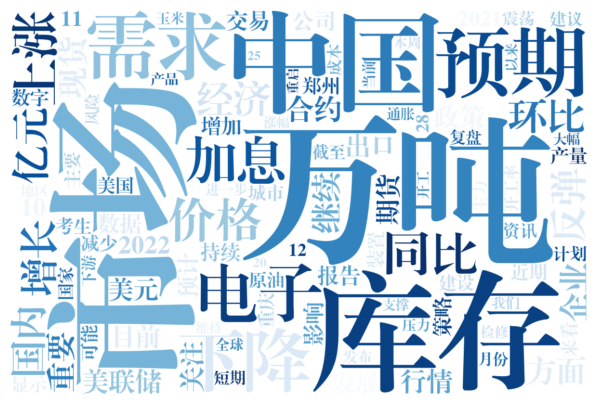

In [54]:
import matplotlib.pyplot as plt

wc = WordCloud(
    width=1200,
    height=800,
    max_words=100, #设置最大显示的词数
    colormap='Blues',
    background_color='white'
    ,font_path='方正小标宋简.TTF'
).generate_from_frequencies(word_freq)

plt.figure(figsize=(10,5))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()